In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [4]:
df = pd.read_csv("dataset.csv")
col_name = 's_no'
if col_name in df.columns:
    df = df.drop(col_name,axis=1)

df.head()

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label
0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular
1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular
2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular
3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular
4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop


In [5]:

new_data = df.copy()
new_data.head()


,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label
0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular
1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular
2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular
3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular
4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop


In [6]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Remove stopwords from each song_name
stop_words = set(stopwords.words('english'))
new_data['song_name'] = new_data['song_name'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
c=0
for i in new_data['song_name']:
    if i=='':
        c+=1
    print(i)
print(c)



Boulevard Broken Dreams
End
Seven Nation Army
Way
Remind
Bring Life
Last Resort
Gonna Girl
Mr. Brightside
Sex Fire
Middle
Numb
Smooth Criminal
Can't Stop
Chop Suey!
Take
Miss
Best
Write Sins Tragedies
Kryptonite
Kill (Bury Me)
Use Somebody
One Knows
Jerk
Uprising
Hey Delilah
Blurry
American Idiot
Welcome Black Parade
Gives Hell
Life
Like Stone
Awhile
Hate Everything
Rollin' (Air Raid Vehicle)
Fat Lip
Pretender
Savior
Bodies
Sugar, We're Goin
Last Nite
Glass
Diary Jane - Single Version
Sickness
Wish
Youth Nation
Vertigo
Miss Murder
Bet Look Good Dancefloor
Steady, Goes
Falling Away
Crawling Dark
Stand Alone
Woman
Show Live
Red
Remedy
Plug Baby
Change (In House Flies) - House Flies LP Version
Judith
MIA (feat. Drake)
Taki Taki (with Selena Gomez, Ozuna & Cardi B)
White Boi
Wanna Love (feat. J. Balvin)
Beautiful (feat. Camila Cabello)
Celoso
Good Vibes
Real Friends
Pa La Calle
Pa Mí
Wake Sky
Está Rico
Banana Clip - Spanish Version
YAKWTFGO (feat. Kali Uchis)
Come
Como Si Na
Blah
Love N He

[nltk_data] Downloading package stopwords to /home/akash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
vanished_data = new_data[new_data['song_name'] == '']
class_distribution = vanished_data['label'].value_counts()
print(class_distribution)

new_df = new_data[new_data['song_name'] != '']
k=0
for i in new_df['song_name']:
    if i=='':
        k+=1
    print(i)
print(k)


Potential Flop           90
Mildly Popular           66
Popular                  35
Potential Masterpiece    20
Name: label, dtype: int64
Boulevard Broken Dreams
End
Seven Nation Army
Way
Remind
Bring Life
Last Resort
Gonna Girl
Mr. Brightside
Sex Fire
Middle
Numb
Smooth Criminal
Can't Stop
Chop Suey!
Take
Miss
Best
Write Sins Tragedies
Kryptonite
Kill (Bury Me)
Use Somebody
One Knows
Jerk
Uprising
Hey Delilah
Blurry
American Idiot
Welcome Black Parade
Gives Hell
Life
Like Stone
Awhile
Hate Everything
Rollin' (Air Raid Vehicle)
Fat Lip
Pretender
Savior
Bodies
Sugar, We're Goin
Last Nite
Glass
Diary Jane - Single Version
Sickness
Wish
Youth Nation
Vertigo
Miss Murder
Bet Look Good Dancefloor
Steady, Goes
Falling Away
Crawling Dark
Stand Alone
Woman
Show Live
Red
Remedy
Plug Baby
Change (In House Flies) - House Flies LP Version
Judith
MIA (feat. Drake)
Taki Taki (with Selena Gomez, Ozuna & Cardi B)
White Boi
Wanna Love (feat. J. Balvin)
Beautiful (feat. Camila Cabello)
Celoso
Good Vibes


In [8]:
from collections import Counter
from collections import Counter
x = list(new_df['song_name'])


words = []
for song_name in x:
    words.extend(song_name.split())

word_counts = Counter(words)
word_counts
# new_df.head()

Counter({'Boulevard': 2,
         'Broken': 27,
         'Dreams': 50,
         'End': 19,
         'Seven': 19,
         'Nation': 10,
         'Army': 9,
         'Way': 127,
         'Remind': 8,
         'Bring': 15,
         'Life': 117,
         'Last': 46,
         'Resort': 2,
         'Gonna': 49,
         'Girl': 120,
         'Mr.': 31,
         'Brightside': 7,
         'Sex': 17,
         'Fire': 70,
         'Middle': 17,
         'Numb': 9,
         'Smooth': 9,
         'Criminal': 4,
         "Can't": 98,
         'Stop': 52,
         'Chop': 8,
         'Suey!': 4,
         'Take': 86,
         'Miss': 26,
         'Best': 43,
         'Write': 2,
         'Sins': 2,
         'Tragedies': 2,
         'Kryptonite': 2,
         'Kill': 6,
         '(Bury': 1,
         'Me)': 19,
         'Use': 5,
         'Somebody': 38,
         'One': 150,
         'Knows': 10,
         'Jerk': 4,
         'Uprising': 1,
         'Hey': 48,
         'Delilah': 6,
         'Blurry': 2

In [9]:

words = []
for song_name in x:
    words.extend(song_name.split())

word_counts = Counter(words)

most_frequent_words = []
for song_name in x:
    words = song_name.split()
    word_counts = Counter(words)
    most_common_word = word_counts.most_common(1)[0][0]
    most_frequent_words.append(most_common_word)

new_df['song_name'] = most_frequent_words
new_df.head()

/tmp/ipykernel_5174/3131993126.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['song_name'] = most_frequent_words


,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label
0,Boulevard,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular
1,End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular
2,Seven,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular
3,Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular
4,Remind,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop


In [10]:
new_df.nunique()

song_name            6225
song_duration_ms    11656
acousticness         3202
danceability          849
energy               1129
instrumentalness     3917
key                    12
liveness             1424
loudness             8364
audio_mode              2
speechiness          1223
tempo               11995
time_signature          5
audio_valence        1242
label                   4
dtype: int64

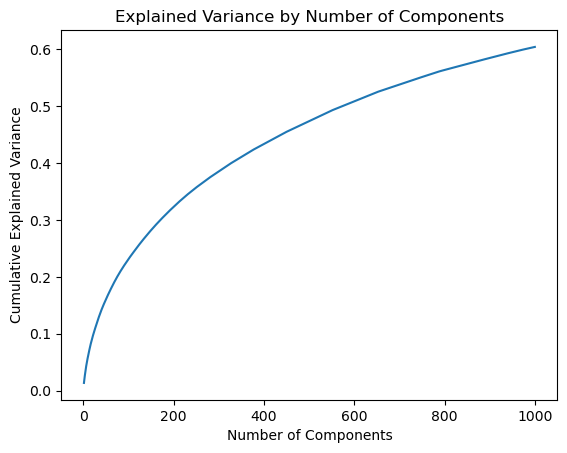

[0.01342868 0.00721238 0.00594247 0.00577527 0.00545713 0.00524005
 0.00465815 0.00428885 0.00422891 0.00406991 0.00376253 0.00374609
 0.00369796 0.00365503 0.0036205  0.00316451 0.00311012 0.003056
 0.00300189 0.00294709 0.00278917 0.00273517 0.00268119 0.0025757
 0.00252627 0.00251836 0.00247252 0.00247252 0.00247252 0.00245363
 0.00241877 0.00240486 0.00235821 0.00230554 0.00225248 0.00219951
 0.00215002 0.00215002 0.00213669 0.00209119 0.00203822 0.00198492
 0.00188126 0.00188126 0.00187364 0.00182751 0.00182751 0.00182751
 0.00181622 0.00177376 0.00176811 0.00172001 0.00172001 0.00172001
 0.00170981 0.00166626 0.00166626 0.00165889 0.00161251 0.00161251
 0.00161251 0.00161251 0.00161251 0.00159722 0.00155876 0.00155337
 0.00150501 0.00150501 0.00150501 0.00150501 0.0014931  0.00145126
 0.00144656 0.00139751 0.00139751 0.00139193 0.00134376 0.00134376
 0.00134376 0.00134376 0.00133516 0.00129001 0.00129001 0.00128535
 0.00123626 0.00123626 0.00123626 0.00123626 0.00123626 0.0012284

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,...,PCA991,PCA992,PCA993,PCA994,PCA995,PCA996,PCA997,PCA998,PCA999,PCA1000
0,Boulevard,262333.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,...,-0.017138,-0.005135,0.000246,-0.005253,0.001382,0.007769,0.001050,0.008525,0.000984,-0.002097
1,End,216933.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,...,0.000015,-0.000149,0.000114,0.000033,-0.000085,-0.000111,0.000086,-0.000046,-0.000049,0.000097
2,Seven,231733.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,...,-0.000015,-0.000094,0.000072,0.000012,-0.000053,-0.000093,0.000058,-0.000038,-0.000008,0.000062
3,Way,216933.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,1.0,...,-0.000003,-0.000020,0.000016,0.000003,-0.000011,-0.000019,0.000012,-0.000009,-0.000001,0.000013
4,Remind,223826.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,1.0,...,0.000673,-0.001499,-0.000603,-0.001171,0.000378,0.000099,0.000062,-0.000584,-0.002638,-0.001490


In [11]:
from sklearn.decomposition import PCA

# Perform one-hot encoding on the song_name column
onehot_encoded = pd.get_dummies(new_df['song_name'], prefix='song_name')

n_components=1000
# Apply PCA on the one-hot encoded features
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(onehot_encoded)

plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Create a new dataframe with the PCA features added to the existing features
new_dataframe = pd.concat([new_df, pd.DataFrame(pca_features, columns=['PCA{}'.format(i) for i in range(1, n_components+1)])], axis=1)
new_dataframe.head()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

if 'song_name' in new_dataframe.columns:
    new_dataframe= new_dataframe.drop('song_name',axis=1)
# print(new_dataframe.head())
new_dataframe = new_dataframe.dropna()
# print(new_dataframe.head())


# Split the data into features and target variable
X = new_dataframe.drop('label', axis=1)
y = new_dataframe['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy




0.46241519674355497

In [13]:
from sklearn.linear_model import LogisticRegression

# Split the data into features and target variable
X = new_dataframe.drop('label', axis=1)
y = new_dataframe['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Fit the classifier to the training data
logreg_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = logreg_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy




0.5218453188602442

In [14]:

import pandas as pd
from textblob import TextBlob
# Assuming 'song_name' is the column containing the song names
song_names = df['song_name']

# Perform sentiment analysis using TextBlob
sentiments = song_names.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Add the sentiment scores to the DataFrame
df['sentiment'] = sentiments

# Group by sentiment and count occurrences
sentiment_counts = df.groupby('sentiment').size()

# Print or plot the results as needed
print(max(sentiment_counts))




14722


In [15]:
from textblob import TextBlob

# Example list of song names
song_names = new_data['song_name']
sentiment_data = new_data.copy()
# Function to classify sentiment using TextBlob
def classify_sentiment(song_name):
    analysis = TextBlob(song_name)
    # Classify sentiment as positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# Apply the sentiment classification function to the song names
classified_sentiments = [classify_sentiment(song) for song in song_names]

# Combine the song names with their respective sentiment classes
classified_songs = list(zip(song_names, classified_sentiments))
Sentiments = []
# Print the results
for song, sentiment in classified_songs:
    print(f"{song}: {sentiment} sentiment")
    Sentiments.append(sentiment)



Boulevard Broken Dreams: -1 sentiment
End: 0 sentiment
Seven Nation Army: 0 sentiment
Way: 0 sentiment
Remind: 0 sentiment
Bring Life: 0 sentiment
Last Resort: 0 sentiment
Gonna Girl: 0 sentiment
Mr. Brightside: 0 sentiment
Sex Fire: 0 sentiment
Middle: 0 sentiment
Numb: -1 sentiment
Smooth Criminal: 0 sentiment
Can't Stop: 0 sentiment
Chop Suey!: 0 sentiment
Take: 0 sentiment
Miss: 0 sentiment
Best: 1 sentiment
Write Sins Tragedies: 0 sentiment
Kryptonite: 0 sentiment
Kill (Bury Me): 0 sentiment
Use Somebody: 0 sentiment
One Knows: 0 sentiment
Jerk: 0 sentiment
Uprising: 0 sentiment
Hey Delilah: 0 sentiment
Blurry: 0 sentiment
American Idiot: -1 sentiment
Welcome Black Parade: 1 sentiment
Gives Hell: 0 sentiment
Life: 0 sentiment
Like Stone: 0 sentiment
Awhile: 0 sentiment
Hate Everything: -1 sentiment
Rollin' (Air Raid Vehicle): 0 sentiment
Fat Lip: 0 sentiment
Pretender: 0 sentiment
Savior: 0 sentiment
Bodies: 0 sentiment
Sugar, We're Goin: 0 sentiment
Last Nite: 0 sentiment
Glass: 

In [16]:
import pandas as pd

new_data['Sentiments'] = Sentiments
if 'song_name' in new_data:
    new_data = new_data.drop('song_name',axis=1)

new_data.head()


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label,Sentiments
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular,-1
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular,0
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular,0
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular,0
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop,0


In [17]:
# sentiment_counts.plot(kind='bar')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.title('Sentiment Counts')
# plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features and target variable
X = new_data.drop('label', axis=1)
y = new_data['label']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = rf_classifier.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Perform k-fold cross-validation
k = 10  # number of folds
scores = cross_val_score(rf_classifier, X, y, cv=k)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} Testing Accuracy: {score}")

# Calculate the mean accuracy score across all folds
mean_accuracy = scores.mean()
print(f"Mean Testing Accuracy: {mean_accuracy}")


Fold 1: 0.6995753715498938
Fold 2: 0.7261146496815286
Fold 3: 0.7340764331210191
Fold 4: 0.7430997876857749
Fold 5: 0.7484076433121019
Fold 6: 0.7392458842272969
Fold 7: 0.7838555496548062
Fold 8: 0.7530536378120021
Fold 9: 0.7450876261285183
Fold 10: 0.7673924588422729
Mean Accuracy: 0.7439909042015215


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# Fit the classifier to the training data
logreg_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = logreg_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5272099814175737

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5272099814175737

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features and target variabl

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6209185027873639

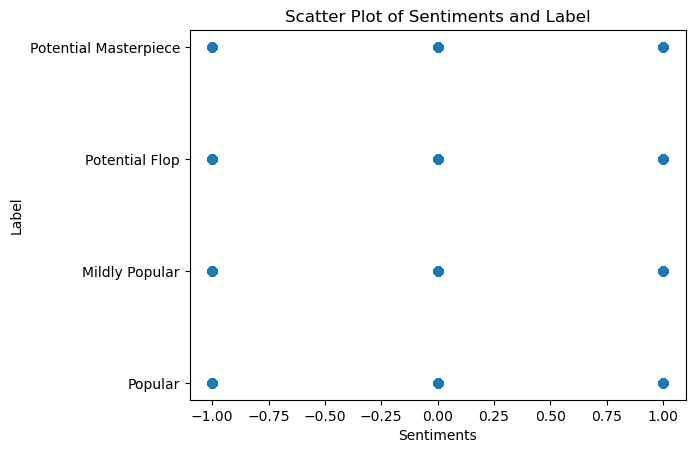

Potential Flop           51.797186
Mildly Popular           24.571277
Popular                  13.697903
Potential Masterpiece     9.933634
Name: label, dtype: float64
Sentiments  label                
-1          Potential Flop            617
            Mildly Popular            310
            Popular                   190
            Potential Masterpiece     105
 0          Potential Flop           7858
            Mildly Popular           3623
            Popular                  2003
            Potential Masterpiece    1481
 1          Potential Flop           1281
            Mildly Popular            695
            Popular                   387
            Potential Masterpiece     285
Name: label, dtype: int64
Sentiments  label                
-1          Potential Flop           50.490998
            Mildly Popular           25.368249
            Popular                  15.548282
            Potential Masterpiece     8.592471
 0          Potential Flop           52.509188

In [22]:
import matplotlib.pyplot as plt

# Perform scatter plot
plt.scatter(new_data['Sentiments'], new_data['label'])

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Label')
plt.title('Scatter Plot of Sentiments and Label')

# Show the plot
plt.show()

# Count the number of data points in each class
class_counts = new_data['label'].value_counts()
class_distribution = class_counts / len(new_data) * 100
print(class_distribution)
# class_counts = new_data['label'].value_counts()
# print(class_counts)
# Calculate the label distribution for each sentiment
class_counts = new_data.groupby('Sentiments')['label'].value_counts()
print(class_counts)


label_distribution = new_data.groupby('Sentiments')['label'].value_counts(normalize=True) * 100

# Print the label distribution
print(label_distribution)



In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Example list of song name
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment(song_name):
    # Get the compound sentiment score from VADER
    sentiment_score = sid.polarity_scores(song_name)['compound']

    # Classify sentiment as positive, neutral, or negative based on the compound score
    if sentiment_score >= 0.05:
        return 1
    elif -0.05 < sentiment_score < 0.05:
        return 0
    else:
        return -1

# Apply the sentiment classification function to the song names
classified_sentiments = [classify_sentiment(song) for song in song_names]

# Combine the song names with their respective sentiment classes
classified_songs = list(zip(song_names, classified_sentiments))

# Print the results
new_sentiments = []
for song, sentiment in classified_songs:
    print(f"{song}: {sentiment} sentiment")
    new_sentiments.append(sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/akash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Boulevard Broken Dreams: -1 sentiment
End: 0 sentiment
Seven Nation Army: 0 sentiment
Way: 0 sentiment
Remind: 0 sentiment
Bring Life: 0 sentiment
Last Resort: 0 sentiment
Gonna Girl: 0 sentiment
Mr. Brightside: 0 sentiment
Sex Fire: -1 sentiment
Middle: 0 sentiment
Numb: -1 sentiment
Smooth Criminal: -1 sentiment
Can't Stop: 1 sentiment
Chop Suey!: 0 sentiment
Take: 0 sentiment
Miss: -1 sentiment
Best: 1 sentiment
Write Sins Tragedies: -1 sentiment
Kryptonite: 0 sentiment
Kill (Bury Me): -1 sentiment
Use Somebody: 0 sentiment
One Knows: 0 sentiment
Jerk: -1 sentiment
Uprising: 0 sentiment
Hey Delilah: 0 sentiment
Blurry: -1 sentiment
American Idiot: -1 sentiment
Welcome Black Parade: 1 sentiment
Gives Hell: -1 sentiment
Life: 0 sentiment
Like Stone: 1 sentiment
Awhile: 0 sentiment
Hate Everything: -1 sentiment
Rollin' (Air Raid Vehicle): 0 sentiment
Fat Lip: 0 sentiment
Pretender: 0 sentiment
Savior: 0 sentiment
Bodies: 0 sentiment
Sugar, We're Goin: 0 sentiment
Last Nite: 0 sentiment

In [24]:
sentiment_data['Sentiments'] = new_sentiments
if 'song_name' in new_data:
    sentiment_data = sentiment_data.drop('song_name',axis=1)
sentiment_data.head()

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label,Sentiments
0,Boulevard Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular,-1
1,End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular,0
2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular,0
3,Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular,0
4,Remind,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop,0


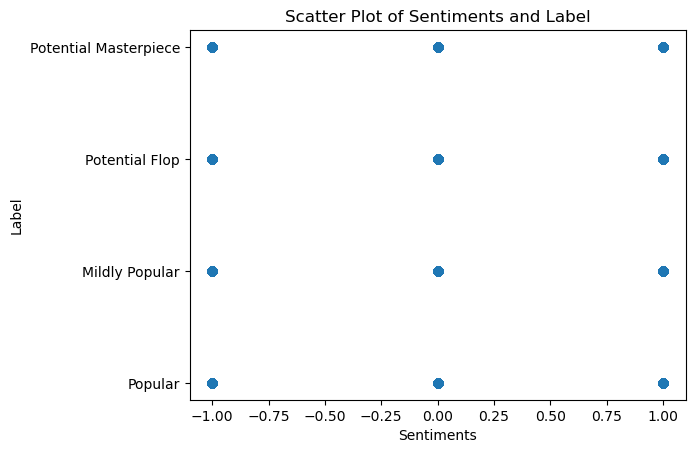

Potential Flop           51.797186
Mildly Popular           24.571277
Popular                  13.697903
Potential Masterpiece     9.933634
Name: label, dtype: float64
Sentiments  label                
-1          Potential Flop            934
            Mildly Popular            502
            Popular                   296
            Potential Masterpiece     166
 0          Potential Flop           7346
            Mildly Popular           3379
            Popular                  1808
            Potential Masterpiece    1295
 1          Potential Flop           1476
            Mildly Popular            747
            Popular                   476
            Potential Masterpiece     410
Name: label, dtype: int64
Sentiments  label                
-1          Potential Flop           49.209694
            Mildly Popular           26.448894
            Popular                  15.595364
            Potential Masterpiece     8.746048
 0          Potential Flop           53.124096

In [25]:
import matplotlib.pyplot as plt

# Perform scatter plot
plt.scatter(sentiment_data['Sentiments'], sentiment_data['label'])

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Label')
plt.title('Scatter Plot of Sentiments and Label')

# Show the plot
plt.show()

# Count the number of data points in each class
class_counts = new_data['label'].value_counts()
class_distribution = class_counts / len(sentiment_data) * 100
print(class_distribution)
# class_counts = new_data['label'].value_counts()
# print(class_counts)
# Calculate the label distribution for each sentiment
class_counts = sentiment_data.groupby('Sentiments')['label'].value_counts()
print(class_counts)


label_distribution = sentiment_data.groupby('Sentiments')['label'].value_counts(normalize=True) * 100

# Print the label distribution
print(label_distribution)

In [26]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features and target variable
X = new_data.drop('label', axis=1)
y = new_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear SVM classifier
svm_classifier = LinearSVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy


/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.2537828510751261

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score

# Split the data into features and target variable
X = new_data.drop('label', axis=1)
y = new_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Calculate the recall score
recall = recall_score(y_test, y_pred,average=None)
print("Recall Score:", recall)

# Calculate the precision score
precision = precision_score(y_test, y_pred,average=None)
print("Precision Score:", precision)


Confusion Matrix:
[[ 288   11  602    0]
 [  20  306  182    7]
 [  65   22 1887   12]
 [   1    4   50  310]]
Classification Report:
                       precision    recall  f1-score   support

       Mildly Popular       0.77      0.32      0.45       901
              Popular       0.89      0.59      0.71       515
       Potential Flop       0.69      0.95      0.80      1986
Potential Masterpiece       0.94      0.85      0.89       365

             accuracy                           0.74      3767
            macro avg       0.82      0.68      0.72      3767
         weighted avg       0.76      0.74      0.71      3767

Recall Score: [0.31964484 0.59417476 0.95015106 0.84931507]
Precision Score: [0.77005348 0.89212828 0.69349504 0.94224924]
